✅ Data loaded successfully!


✅ Data merged successfully!
Plant 1: (68774, 16)
Plant 2: (67698, 16)


/tmp/ipython-input-33971186.py:24: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
/tmp/ipython-input-33971186.py:53: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plant1.fillna(method='ffill', inplace=True)
/tmp/ipython-input-33971186.py:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plant2.fillna(method='ffill', inplace=True)



📊 Basic Statistics Plant 1:


,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR_x,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR_y,TOTAL_POWER,MONTH
count,68774,68774.0,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.0,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,4135001.0,3147.177450,307.778375,3295.834644,6.978728e+06,11.567075,4135001.0,25.558521,31.244997,0.232305,11.567075,3454.955826,5.518539
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,0.000000,4135001.0,20.398505,18.140415,0.000000,0.000000,0.000000,5.000000
25%,2020-05-24 00:33:45,4135001.0,0.000000,0.000000,0.000000,6.512007e+06,6.000000,4135001.0,22.724491,21.123944,0.000000,6.000000,0.000000,5.000000
50%,2020-06-01 14:15:00,4135001.0,428.571429,41.450000,2658.473214,7.146685e+06,12.000000,4135001.0,24.670178,24.818984,0.031620,12.000000,470.021429,6.000000
75%,2020-06-09 20:00:00,4135001.0,6365.468750,623.561161,6274.000000,7.268751e+06,17.000000,4135001.0,27.960429,41.693659,0.454880,17.000000,6989.087500,6.000000
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,23.000000,4135001.0,35.252486,65.545714,1.221652,23.000000,15882.075000,6.000000
std,NaN,0.0,4036.441826,394.394865,3145.220597,4.162707e+05,6.862651,0.0,3.361300,12.308283,0.301948,6.862651,4430.835345,0.499660


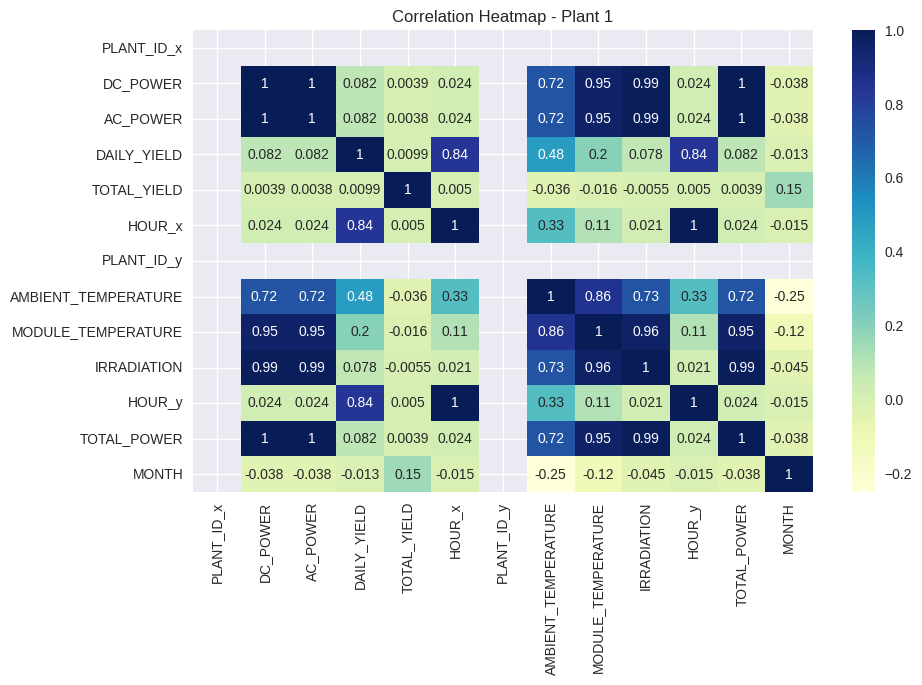

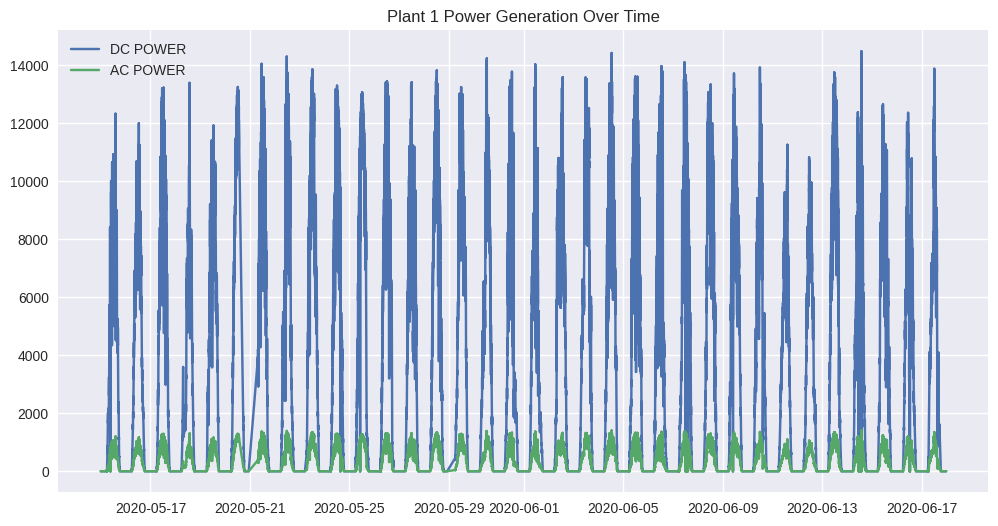

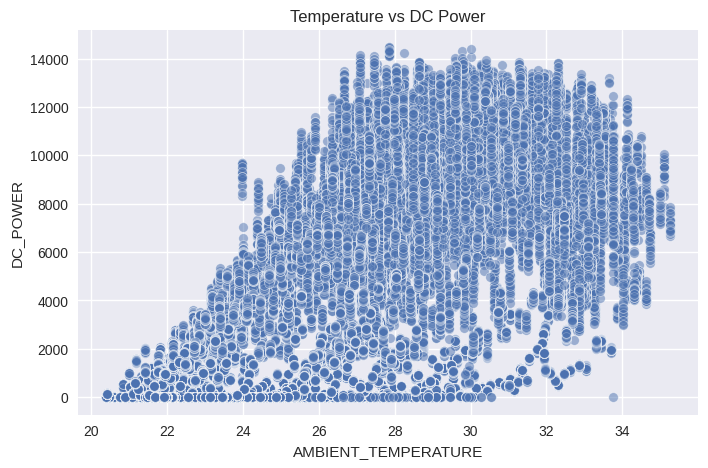

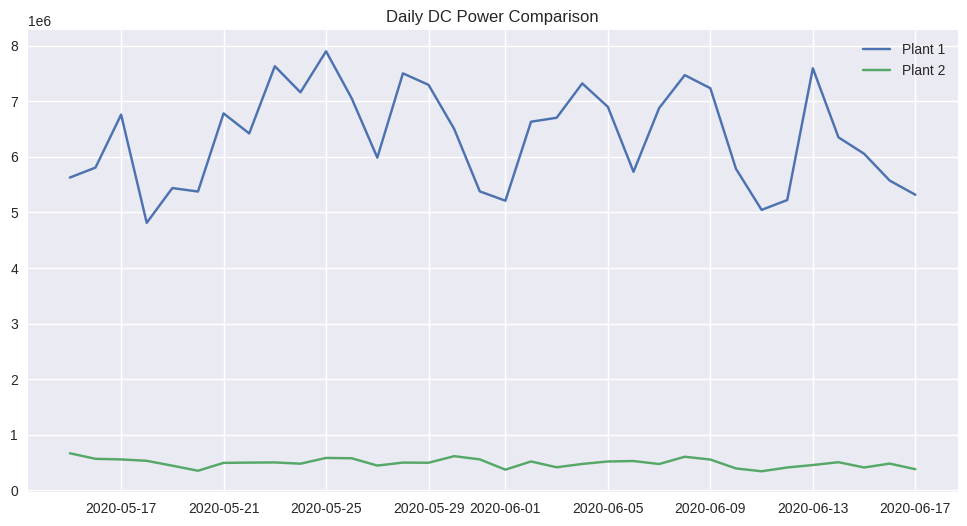

✔ Found column: AMBIENT_TEMPERATURE
✔ Found column: MODULE_TEMPERATURE
✔ Found column: IRRADIATION
Data shape after cleaning: (68774, 21)
✅ Data split successfully!


,MAE,RMSE,R²
Linear Regression,266.264856,566.999792,0.980106
Random Forest,168.379704,469.242796,0.986374
XGBoost,175.684995,474.674222,0.986057


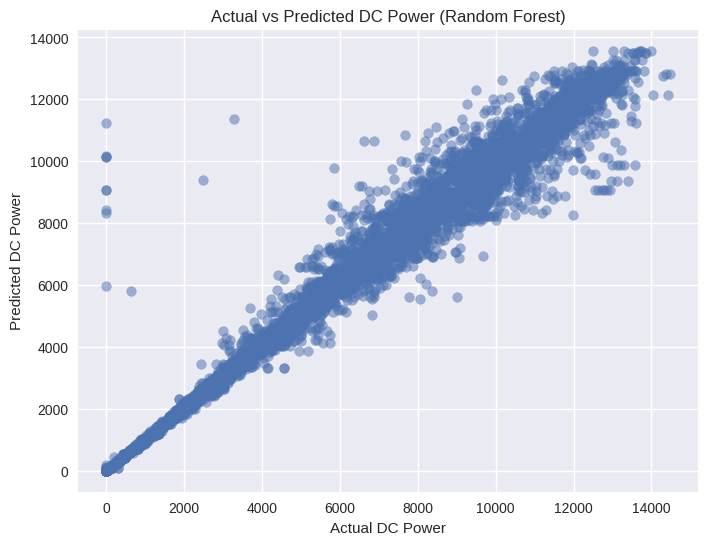

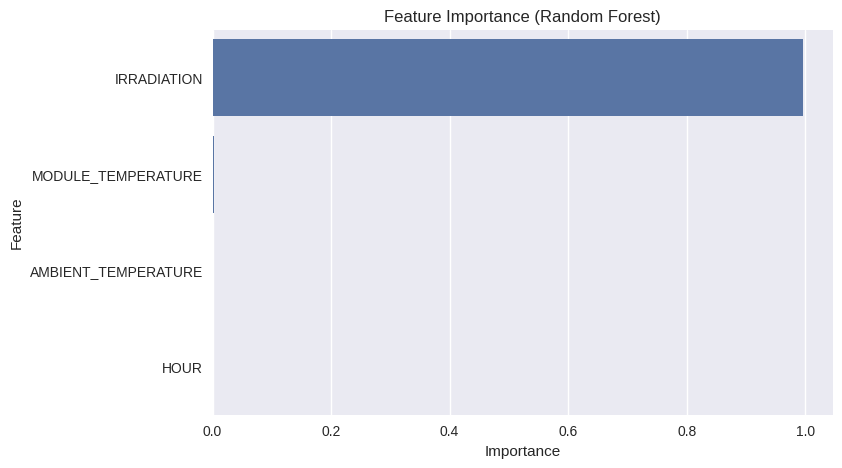


Final Model Performance:
MAE : 168.44795780852877
RMSE: 469.2130065915841
R²  : 0.9863760270492599

✅ Model saved as 'solar_power_rf_model.pkl'


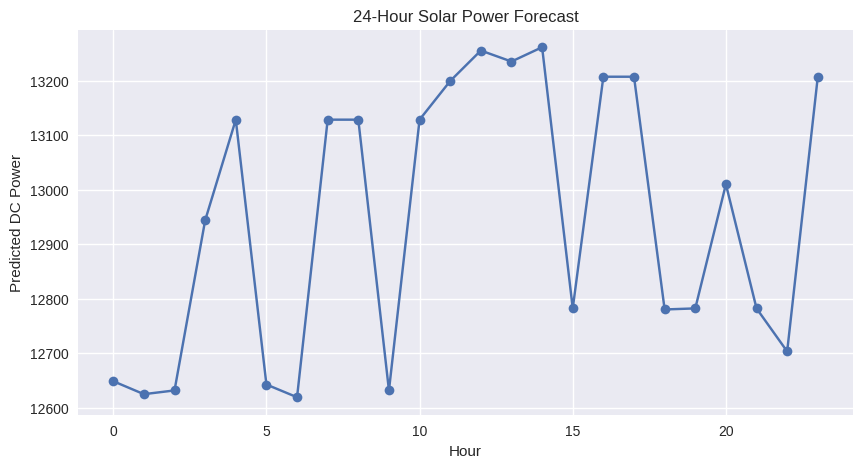

✅ Streamlit dashboard file created: streamlit_app.py


In [11]:
# ==============================
# WEEK 1: Solar Power Generation Prediction
# Step 1: Data Loading, Cleaning, Merging, and EDA
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

# Load datasets
plant1_gen = pd.read_csv('Plant_1_Generation_Data.csv')
plant1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
plant2_gen = pd.read_csv('Plant_2_Generation_Data.csv')
plant2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

print("✅ Data loaded successfully!\n")

# Convert DATE_TIME to datetime + extract DATE & HOUR
for df in [plant1_gen, plant1_weather, plant2_gen, plant2_weather]:
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
    df['DATE'] = df['DATE_TIME'].dt.date
    df['HOUR'] = df['DATE_TIME'].dt.hour

# Merge

plant1 = pd.merge(
    plant1_gen,
    plant1_weather,
    on='DATE_TIME',
    how='inner'
)

plant2 = pd.merge(
    plant2_gen,
    plant2_weather,
    on='DATE_TIME',
    how='inner'
)

print("\n✅ Data merged successfully!")
print("Plant 1:", plant1.shape)
print("Plant 2:", plant2.shape)

# Create TOTAL_POWER (only once)
for df in [plant1, plant2]:
    df['TOTAL_POWER'] = df['DC_POWER'] + df['AC_POWER']

# Fill missing values
plant1.fillna(method='ffill', inplace=True)
plant2.fillna(method='ffill', inplace=True)

# Add features
def add_features(df):
    df['MONTH'] = df['DATE_TIME'].dt.month
    df['WEEKDAY'] = df['DATE_TIME'].dt.day_name()
    return df

plant1 = add_features(plant1)
plant2 = add_features(plant2)

# =====================
#       EDA
# =====================

print("\n📊 Basic Statistics Plant 1:")
display(plant1.describe())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(plant1.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap - Plant 1')
plt.show()

# DC/AC Power over time
plt.figure(figsize=(12,6))
plt.plot(plant1['DATE_TIME'], plant1['DC_POWER'], label='DC POWER')
plt.plot(plant1['DATE_TIME'], plant1['AC_POWER'], label='AC POWER')
plt.legend()
plt.title("Plant 1 Power Generation Over Time")
plt.show()

# Temperature vs DC Power
plt.figure(figsize=(8,5))
sns.scatterplot(data=plant1, x='AMBIENT_TEMPERATURE', y='DC_POWER', alpha=0.5)
plt.title("Temperature vs DC Power")
plt.show()

# ensure DATE exists right before grouping
plant1['DATE'] = pd.to_datetime(plant1['DATE_TIME']).dt.date
plant2['DATE'] = pd.to_datetime(plant2['DATE_TIME']).dt.date

# Daily energy comparison
plant1_daily = plant1.groupby('DATE')['DC_POWER'].sum().reset_index()
plant2_daily = plant2.groupby('DATE')['DC_POWER'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(plant1_daily['DATE'], plant1_daily['DC_POWER'], label='Plant 1')
plt.plot(plant2_daily['DATE'], plant2_daily['DC_POWER'], label='Plant 2')
plt.legend()
plt.title("Daily DC Power Comparison")
plt.show()

plant1['DATE_TIME'] = pd.to_datetime(plant1['DATE_TIME'])

# Recreate DATE and HOUR safely
plant1['DATE'] = plant1['DATE_TIME'].dt.date
plant1['HOUR'] = plant1['DATE_TIME'].dt.hour

# Also ensure weather + gen merge didn't break temp/irr columns
required_cols = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
for col in required_cols:
    if col not in plant1.columns:
        print(f"❌ Missing column: {col}")
    else:
        print(f"✔ Found column: {col}")

# ==============================
# WEEK 2: Model Building & Prediction
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --------------------------
# Feature Selection
# --------------------------
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
target = 'DC_POWER'

# Drop missing rows (if any)
plant1_model = plant1.dropna(subset=features + [target])

# Input and output
X = plant1_model[features]
y = plant1_model[target]

print("Data shape after cleaning:", plant1_model.shape)

# --------------------------
# Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split successfully!")

# Define Models

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train & Evaluate Models

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, rmse, r2]

# Display results
results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R²'])
display(results_df.T)

# Best Model Visualization (Random Forest)

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.title('Actual vs Predicted DC Power (Random Forest)')
plt.show()


# Feature Importance

importances = best_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.show()


# ==========================================
# WEEK 3 – Hyperparameter Tuning, Final Model & Streamlit App
# ==========================================

import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# LOAD CLEANED DATA

data = plant1.copy()

features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
target = 'DC_POWER'

df = data.dropna(subset=features + [target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TRAIN FINAL MODEL (BEST MODEL)

final_model = RandomForestRegressor(n_estimators=150, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

# SAVE MODEL FOR DEPLOYMENT

pickle.dump(final_model, open("solar_power_rf_model.pkl", "wb"))
print("\n✅ Model saved as 'solar_power_rf_model.pkl'")

# FORECASTING NEXT 24 HOURS

future_hours = pd.DataFrame({
    'AMBIENT_TEMPERATURE': np.random.uniform(20, 35, 24),
    'MODULE_TEMPERATURE': np.random.uniform(25, 45, 24),
    'IRRADIATION': np.random.uniform(0, 900, 24),
    'HOUR': np.arange(24)
})

future_pred = final_model.predict(future_hours)

plt.figure(figsize=(10,5))
plt.plot(range(24), future_pred, marker='o')
plt.title("24-Hour Solar Power Forecast")
plt.xlabel("Hour")
plt.ylabel("Predicted DC Power")
plt.grid(True)
plt.show()

# ============================
# STREAMLIT DASHBOARD (CODE)
# ============================

dashboard_code = """
import streamlit as st
import pandas as pd
import pickle

model = pickle.load(open("solar_power_rf_model.pkl", "rb"))

st.title("⚡ Solar Power Prediction Dashboard")

temp = st.number_input("Ambient Temperature")
module_temp = st.number_input("Module Temperature")
irr = st.number_input("Irradiation")
hour = st.number_input("Hour (0-23)", min_value=0, max_value=23)

if st.button("Predict"):
    X = pd.DataFrame([[temp, module_temp, irr, hour]],
                     columns=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR'])

    pred = model.predict(X)[0]
    st.success(f"Predicted DC Power: {pred:.2f} kW")
"""

with open("streamlit_app.py", "w") as f:
    f.write(dashboard_code)

print("✅ Streamlit dashboard file created: streamlit_app.py")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
